In [137]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [138]:
df=pd.read_csv('/content/drive/MyDrive/archive (8)/weather_classification_data.csv')
df

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82         2  Winter              3.5    inland   
1                   1011.43         7  Spring             10.0    inland   
2                   1018.72         5  Spring              5.5  mountain   
3                   1026.25         7  Spring              1.0   coastal   
4                    990.67         1  Winter              2.5  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15         1  Summer              1.0  mountain   
13196               1067.23         1  Winter              6.0   coastal   
13197               1012.69         3  Autumn              9.0   coastal   
13198                984.27         0  Winter              2.0    inland   
13199               1015.37         5  Autumn             10.0  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.

Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.

Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.

Precipitation (%) (numeric): The precipitation percentage, including outlier values.

Cloud Cover (categorical): The cloud cover description.

Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.

UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.

Season (categorical): The season during which the data was recorded.

Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.

Location (categorical): The type of location where the data was recorded.

Weather Type (categorical): The target variable .

In [139]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [140]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

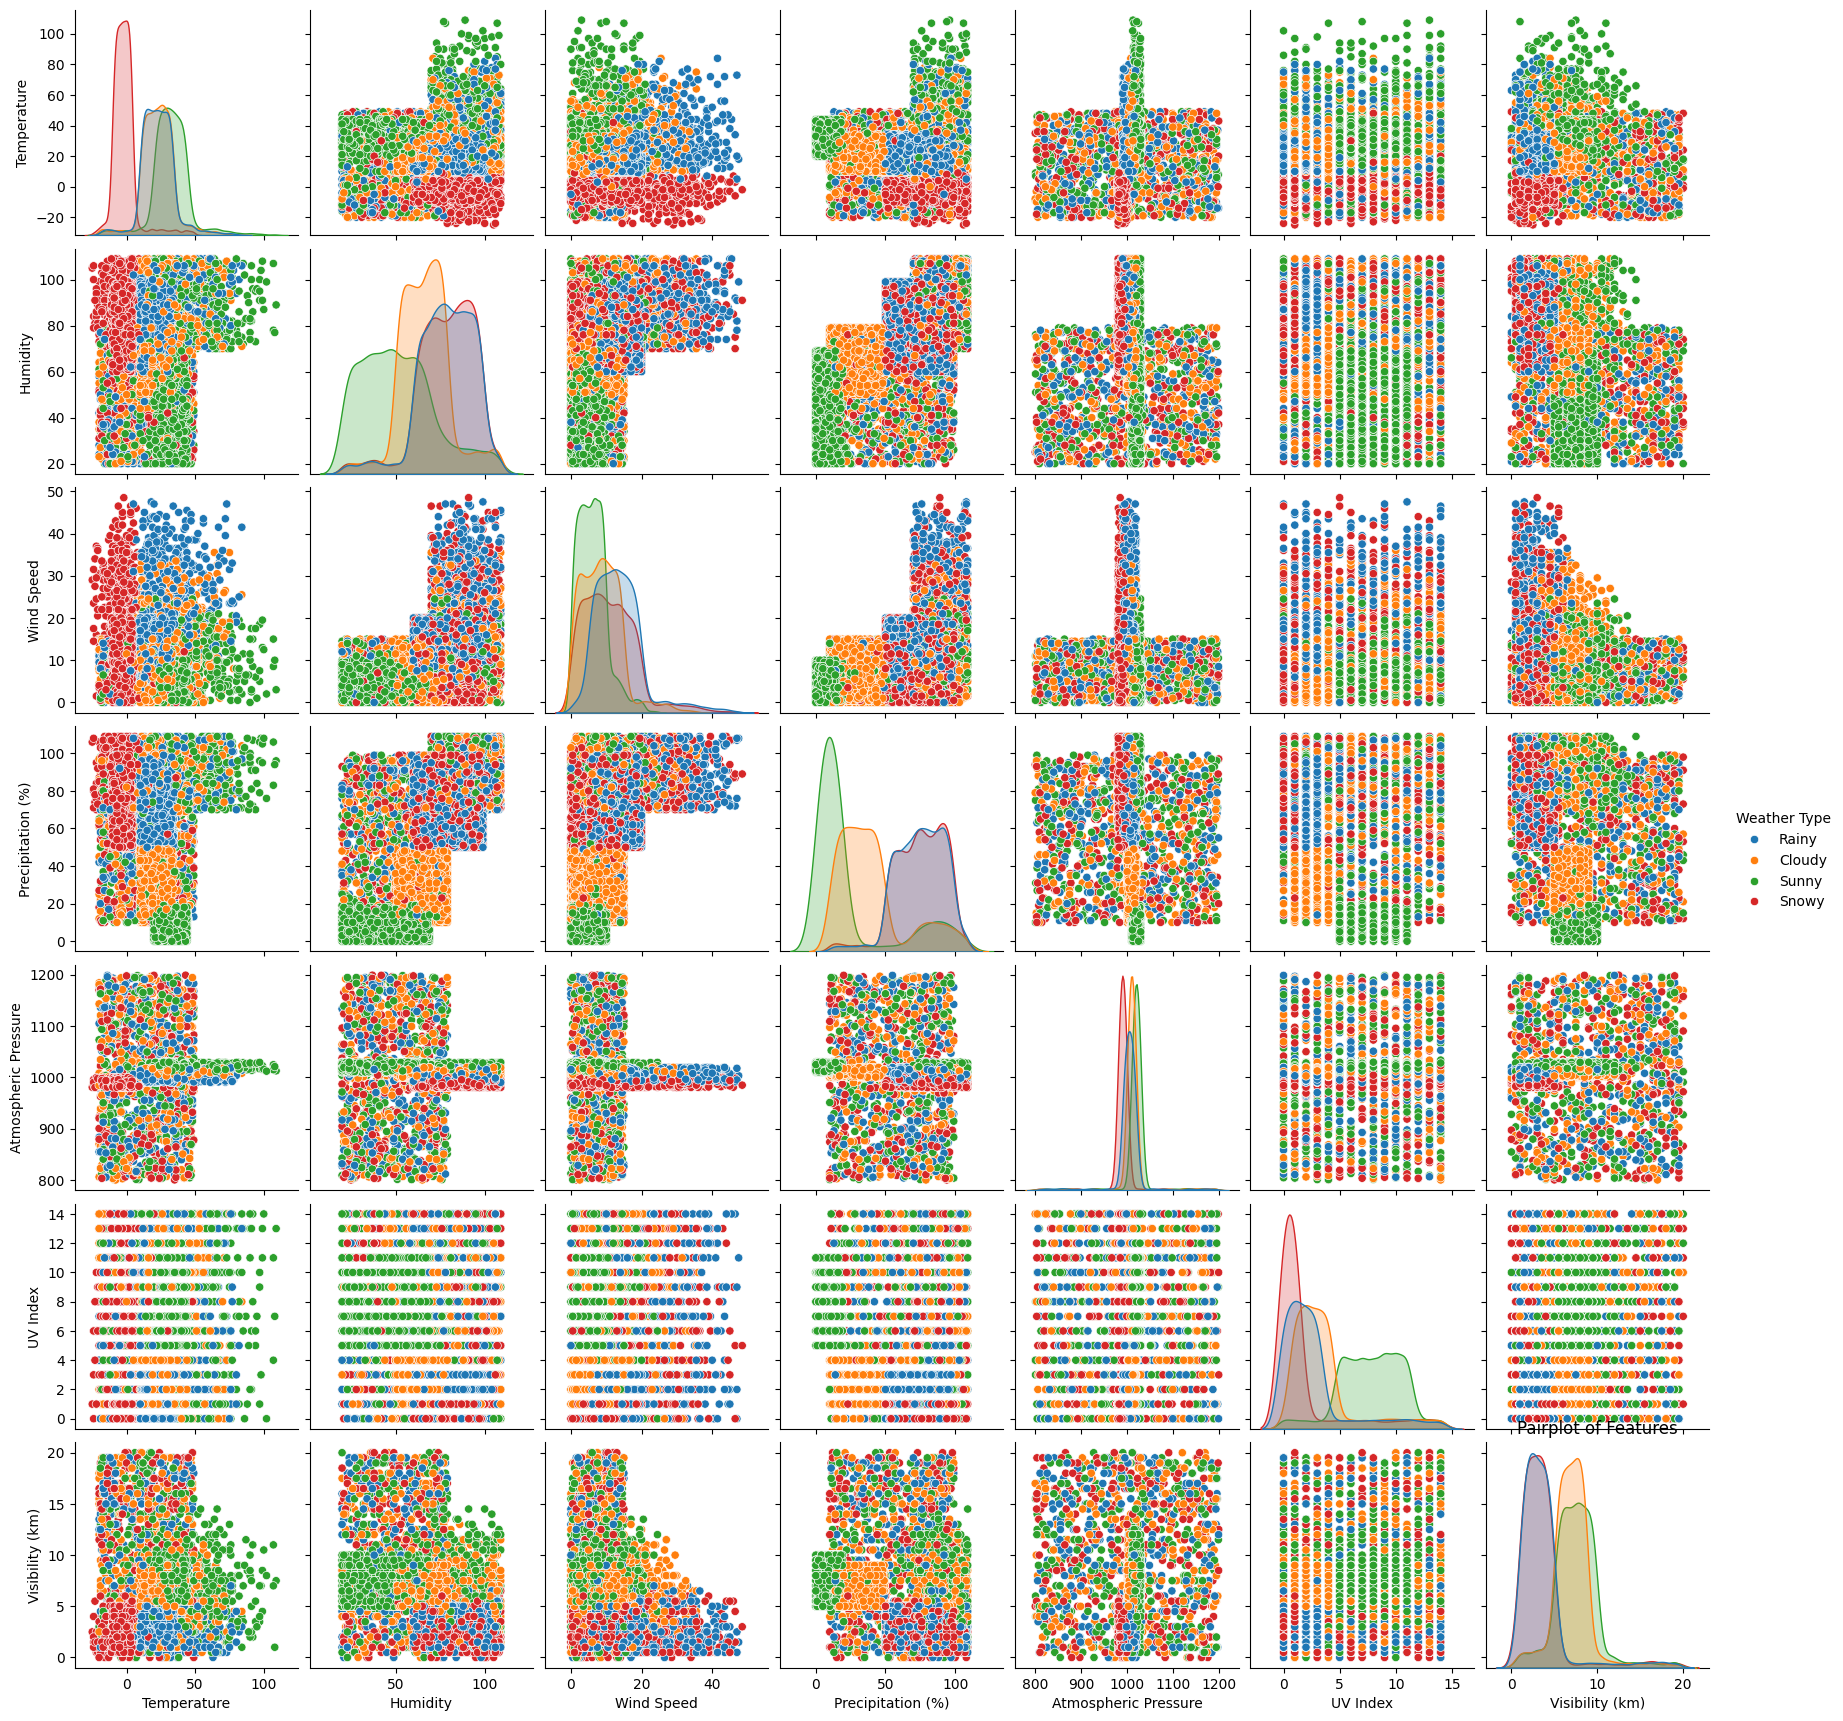

In [141]:
sns.pairplot(df,hue='Weather Type')
plt.title('Pairplot of Features')
plt.show()

 Visualize the relationships between numerical features and the target, spotting clusters or trends.

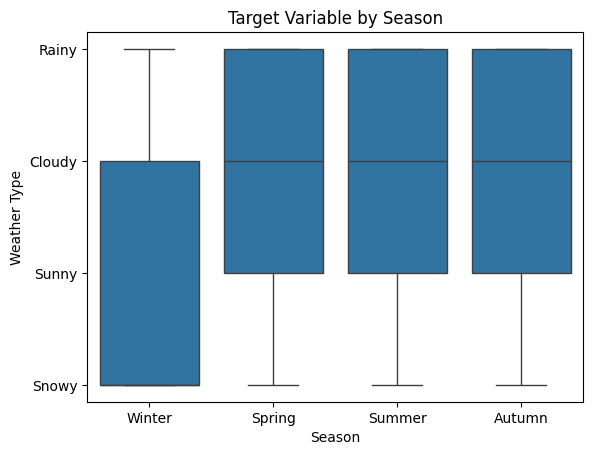

In [142]:
sns.boxplot(x='Season',y='Weather Type',data=df)
plt.title("Target Variable by Season")
plt.show()

 Assess how the target variable varies across different seasons, potentially revealing seasonal trends.

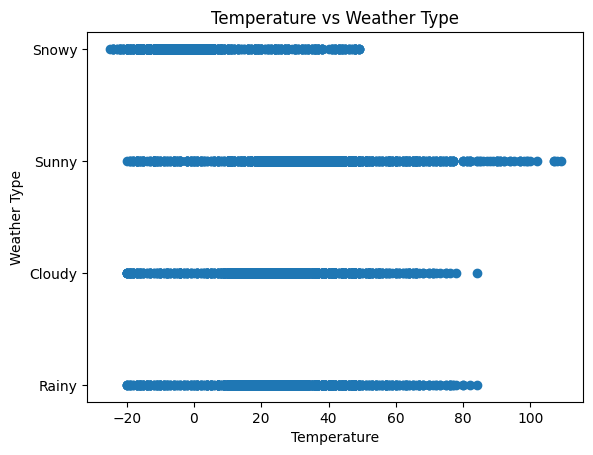

In [143]:
plt.scatter(df['Temperature'], df['Weather Type'])
plt.xlabel('Temperature')
plt.ylabel('Weather Type')
plt.title('Temperature vs Weather Type')
plt.show()

Examine the relationship between temperature and the target, identifying trends or clusters.

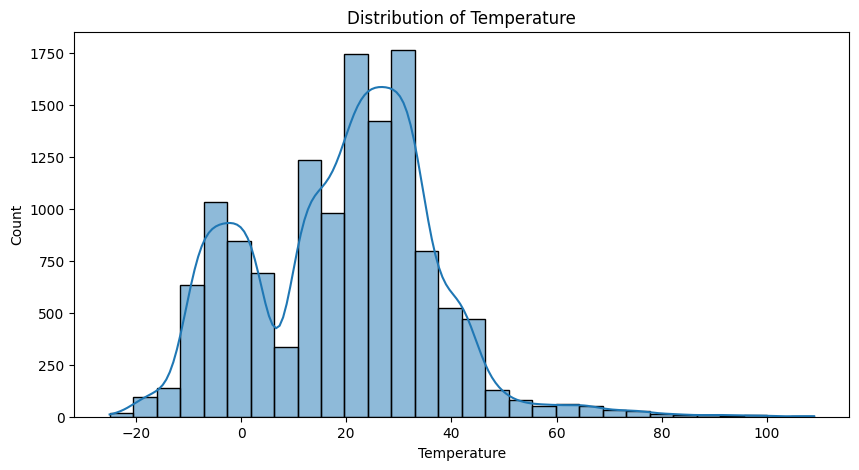

In [144]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Temperature'],bins=30, kde=True)
plt.title("Distribution of Temperature")
plt.show()

Understand the distribution of temperature

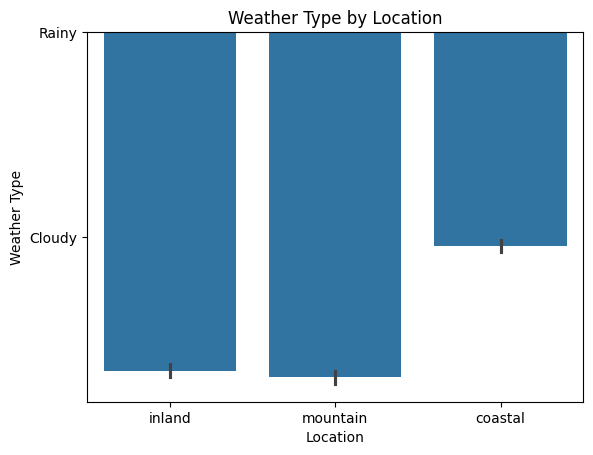

In [145]:
sns.barplot(x='Location', y='Weather Type', data=df)
plt.title("Weather Type by Location")
plt.show()

Compare average target values across locations, revealing geographic differences.

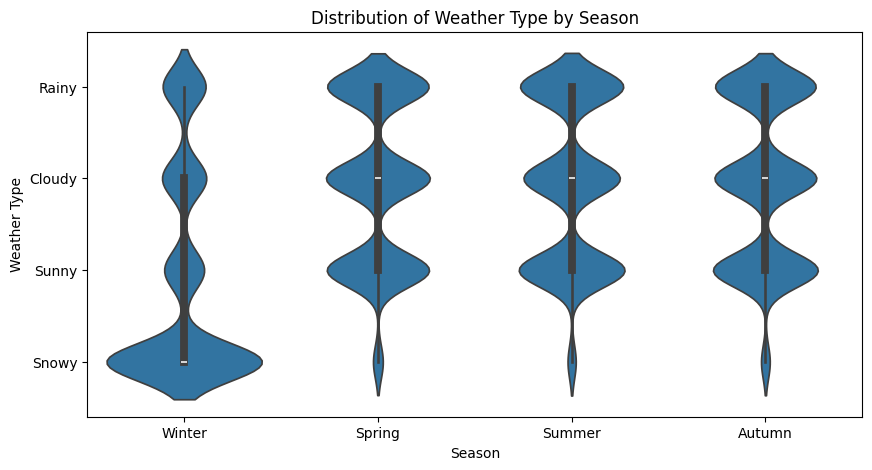

In [146]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Season', y='Weather Type', data=df)
plt.title("Distribution of Weather Type by Season")
plt.show()

Visualize the distribution shape of the target across seasons, highlighting differences in variability

In [147]:
df['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [148]:
df['Season'].value_counts()

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [149]:
df['Location'].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

In [150]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [151]:
encoder=LabelEncoder()
df['Cloud Cover']=encoder.fit_transform(df['Cloud Cover'])
encoder1=LabelEncoder()
df['Season']=encoder1.fit_transform(df['Season'])
encoder2=LabelEncoder()
df['Location']=encoder2.fit_transform(df['Location'])
encoder3=LabelEncoder()
df['Weather Type']=encoder3.fit_transform(df['Weather Type'])

In [152]:
df

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0             14.0        73         9.5               82.0            3   
1             39.0        96         8.5               71.0            3   
2             30.0        64         7.0               16.0            0   
3             38.0        83         1.5               82.0            0   
4             27.0        74        17.0               66.0            2   
...            ...       ...         ...                ...          ...   
13195         10.0        74        14.5               71.0            2   
13196         -1.0        76         3.5               23.0            1   
13197         30.0        77         5.5               28.0            2   
13198          3.0        76        10.0               94.0            2   
13199         -5.0        38         0.0               92.0            2   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82         2       3              3.5         1   
1                   1011.43         7       1             10.0         1   
2                   1018.72         5       1              5.5         2   
3                   1026.25         7       1              1.0         0   
4                    990.67         1       3              2.5         2   
...                     ...       ...     ...              ...       ...   
13195               1003.15         1       2              1.0         2   
13196               1067.23         1       3              6.0         0   
13197               1012.69         3       0              9.0         0   
13198                984.27         0       3              2.0         1   
13199               1015.37         5       0             10.0         2   

       Weather Type  
0                 1  
1                 0  
2                 3  
3                 3  
4                 1  
...             ...  
13195             1  
13196             2  
13197             0  
13198             2  
13199             1  

[13200 rows x 11 columns]

In [153]:
X=df.iloc[:,:-1]
X

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0             14.0        73         9.5               82.0            3   
1             39.0        96         8.5               71.0            3   
2             30.0        64         7.0               16.0            0   
3             38.0        83         1.5               82.0            0   
4             27.0        74        17.0               66.0            2   
...            ...       ...         ...                ...          ...   
13195         10.0        74        14.5               71.0            2   
13196         -1.0        76         3.5               23.0            1   
13197         30.0        77         5.5               28.0            2   
13198          3.0        76        10.0               94.0            2   
13199         -5.0        38         0.0               92.0            2   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  
0                   1010.82         2       3              3.5         1  
1                   1011.43         7       1             10.0         1  
2                   1018.72         5       1              5.5         2  
3                   1026.25         7       1              1.0         0  
4                    990.67         1       3              2.5         2  
...                     ...       ...     ...              ...       ...  
13195               1003.15         1       2              1.0         2  
13196               1067.23         1       3              6.0         0  
13197               1012.69         3       0              9.0         0  
13198                984.27         0       3              2.0         1  
13199               1015.37         5       0             10.0         2  

[13200 rows x 10 columns]

In [154]:
Y=df.iloc[:,-1].values
Y

array([1, 0, 3, ..., 0, 2, 1])

In [155]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.29104478, 0.59550562, 0.19587629, ..., 1.        , 0.175     ,
        0.5       ],
       [0.47761194, 0.85393258, 0.17525773, ..., 0.33333333, 0.5       ,
        0.5       ],
       [0.41044776, 0.49438202, 0.1443299 , ..., 0.33333333, 0.275     ,
        1.        ],
       ...,
       [0.41044776, 0.64044944, 0.11340206, ..., 0.        , 0.45      ,
        0.        ],
       [0.20895522, 0.62921348, 0.20618557, ..., 1.        , 0.1       ,
        0.5       ],
       [0.14925373, 0.20224719, 0.        , ..., 0.        , 0.5       ,
        1.        ]])

In [156]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1)

In [157]:
knn=KNeighborsClassifier()
sv=SVC()
na=GaussianNB()
de=DecisionTreeClassifier()
ra=RandomForestClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier()
ad=AdaBoostClassifier()

In [158]:
models=[knn,sv,na,de,ra,gr,xg,ad]
for model in models:
  print("*********************",model,"***********************")
  model.fit(X_train,Y_train)
  Y_prd=model.predict(X_test)
  print(classification_report(Y_test,Y_prd))


********************* KNeighborsClassifier() ***********************
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       996
           1       0.85      0.87      0.86      1006
           2       0.92      0.92      0.92       990
           3       0.92      0.90      0.91       968

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

********************* SVC() ***********************
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       996
           1       0.89      0.89      0.89      1006
           2       0.94      0.92      0.93       990
           3       0.91      0.90      0.90       968

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

*********

In [159]:
df.corr()

Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Cloud Cover             -0.224642  0.277199    0.183863           0.267368   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Season                  -0.377942  0.189145    0.058676           0.210372   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   
Location                -0.196108  0.079968    0.014091           0.091911   
Weather Type             0.028923 -0.250558   -0.166485          -0.161578   

                      Cloud Cover  Atmospheric Pressure  UV Index    Season  \
Temperature             -0.224642              0.209188  0.374773 -0.377942   
Humidity                 0.277199             -0.120653 -0.342694  0.189145   
Wind Speed               0.183863             -0.077757 -0.068147  0.058676   
Precipitation (%)        0.267368             -0.177444 -0.291601  0.210372   
Cloud Cover              1.000000             -0.096133 -0.347301  0.076947   
Atmospheric Pressure    -0.096133              1.000000  0.154128 -0.126795   
UV Index                -0.347301              0.154128  1.000000 -0.201870   
Season                   0.076947             -0.126795 -0.201870  1.000000   
Visibility (km)         -0.169604              0.120182  0.362922 -0.231691   
Location                 0.030464             -0.077053 -0.100510  0.147115   
Weather Type            -0.536681              0.030679  0.345804  0.118791   

                      Visibility (km)  Location  Weather Type  
Temperature                  0.250751 -0.196108      0.028923  
Humidity                    -0.479969  0.079968     -0.250558  
Wind Speed                  -0.311828  0.014091     -0.166485  
Precipitation (%)           -0.457444  0.091911     -0.161578  
Cloud Cover                 -0.169604  0.030464     -0.536681  
Atmospheric Pressure         0.120182 -0.077053      0.030679  
UV Index                     0.362922 -0.100510      0.345804  
Season                      -0.231691  0.147115      0.118791  
Visibility (km)              1.000000 -0.093642      0.047448  
Location                    -0.093642  1.000000      0.071665  
Weather Type                 0.047448  0.071665      1.000000

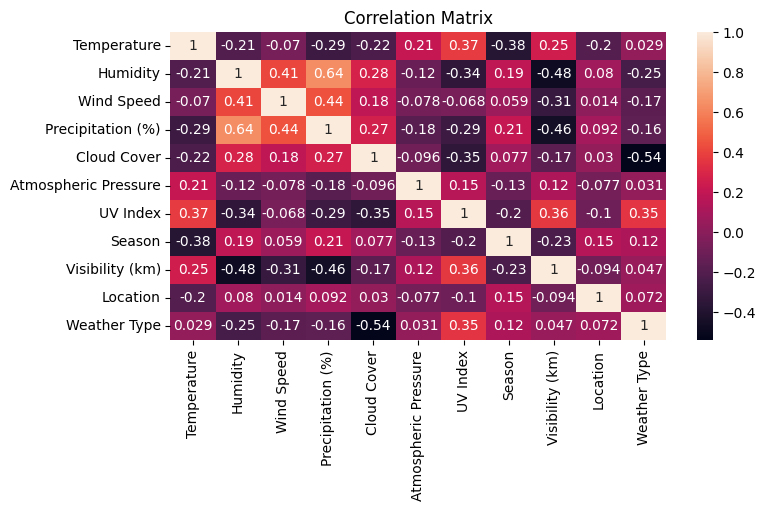

In [160]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

 Identify which features correlate strongly with the target variable, guiding feature selection.

In [161]:
X.drop(['Atmospheric Pressure'],axis=1,inplace=True)

In [162]:
scal=MinMaxScaler()
X_new=scal.fit_transform(X)
X_new

array([[0.29104478, 0.59550562, 0.19587629, ..., 1.        , 0.175     ,
        0.5       ],
       [0.47761194, 0.85393258, 0.17525773, ..., 0.33333333, 0.5       ,
        0.5       ],
       [0.41044776, 0.49438202, 0.1443299 , ..., 0.33333333, 0.275     ,
        1.        ],
       ...,
       [0.41044776, 0.64044944, 0.11340206, ..., 0.        , 0.45      ,
        0.        ],
       [0.20895522, 0.62921348, 0.20618557, ..., 1.        , 0.1       ,
        0.5       ],
       [0.14925373, 0.20224719, 0.        , ..., 0.        , 0.5       ,
        1.        ]])

In [163]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_new,Y,test_size=0.3,random_state=1)

In [164]:
knn1=KNeighborsClassifier()
sv1=SVC()
na1=GaussianNB()
de1=DecisionTreeClassifier()
ra1=RandomForestClassifier()
gr1=GradientBoostingClassifier()
xg1=XGBClassifier()
ad1=AdaBoostClassifier()

In [165]:
m=[knn,sv,na,de,ra,gr,xg,ad]
for i in m:
  print("*********************",i,"***********************")
  i.fit(X_train1,Y_train1)
  Y_prd1=i.predict(X_test1)
  print(classification_report(Y_test1,Y_prd1))


********************* KNeighborsClassifier() ***********************
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       996
           1       0.85      0.87      0.86      1006
           2       0.92      0.92      0.92       990
           3       0.93      0.89      0.91       968

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

********************* SVC() ***********************
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       996
           1       0.90      0.88      0.89      1006
           2       0.93      0.93      0.93       990
           3       0.91      0.90      0.90       968

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

*********

After conducting feature selection, I observed no significant change in model accuracy, indicating that the selected features do not have a substantial impact on performance.